# Student Performance Prediction Model

In [122]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [123]:
df = pd.read_csv("C:/Dataset-DS/Student_Performance.csv")
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [125]:
df.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [126]:
df.columns

Index(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index'],
      dtype='object')

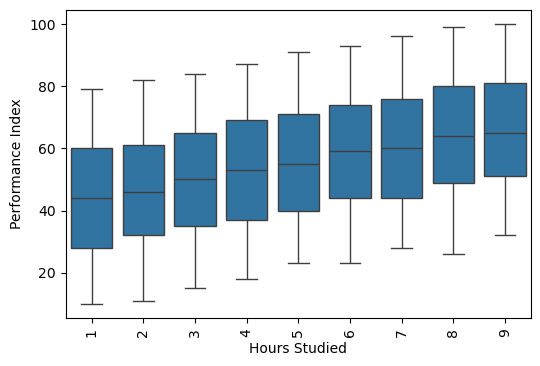

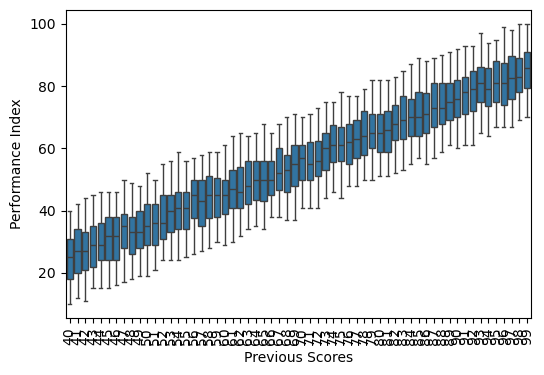

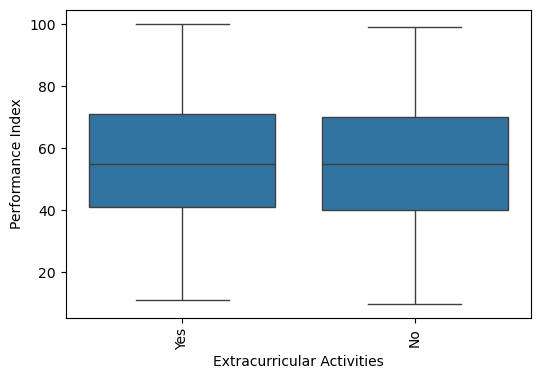

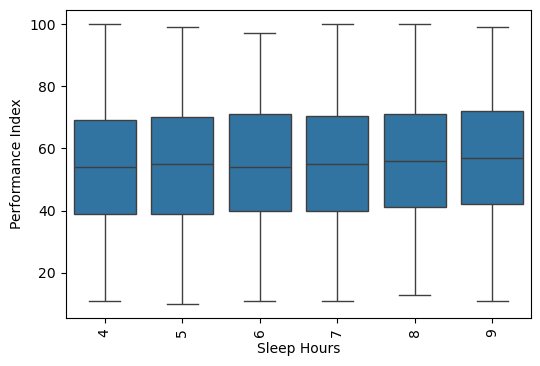

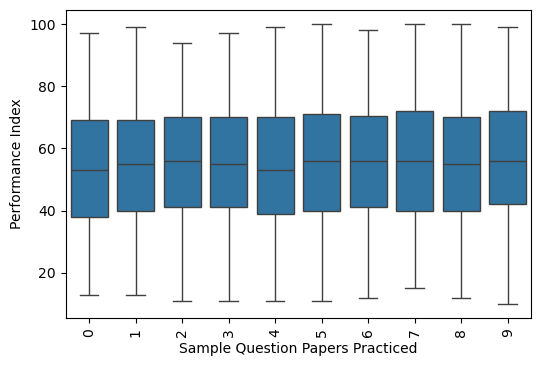

In [127]:
numeric_col = ['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced']
for col in numeric_col:
    plt.figure(figsize=(6,4))
    sns.boxplot(data=df, x=col, y='Performance Index')
    plt.xticks(rotation=90)
    plt.show()

<Axes: >

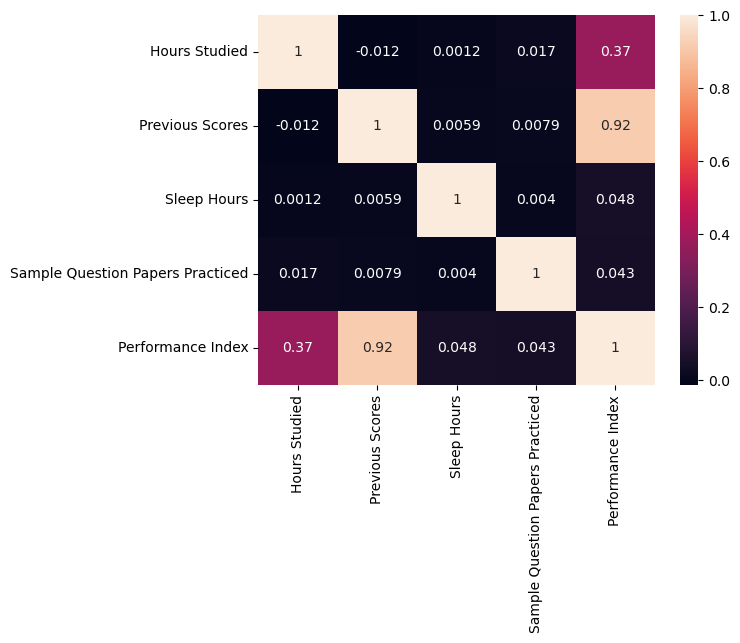

In [128]:
sns.heatmap(df.corr(numeric_only=True), annot=True, )

In [129]:
X = df.drop(columns=['Performance Index'], axis=1)
y = df['Performance Index']

In [130]:
X['Extracurricular Activities'] = X['Extracurricular Activities'].replace({'Yes': 1, 'No': 0})

C:\Users\91755\AppData\Local\Temp\ipykernel_23176\1364833834.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X['Extracurricular Activities'] = X['Extracurricular Activities'].replace({'Yes': 1, 'No': 0})


In [131]:
X

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
0,7,99,1,9,1
1,4,82,0,4,2
2,8,51,1,7,2
3,5,52,1,5,2
4,7,75,0,8,5
...,...,...,...,...,...
9995,1,49,1,4,2
9996,7,64,1,8,5
9997,6,83,1,8,5
9998,9,97,1,7,0


In [132]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [133]:
X.columns

Index(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced'],
      dtype='object')

In [134]:
X[['Hours Studied', 'Previous Scores', 'Sleep Hours', 'Sample Question Papers Practiced']] = scaler.fit_transform(X[['Hours Studied', 'Previous Scores', 'Sleep Hours', 'Sample Question Papers Practiced']])
X

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
0,0.775188,1.704176,1,1.456205,-1.249754
1,-0.383481,0.723913,0,-1.492294,-0.900982
2,1.161410,-1.063626,1,0.276805,-0.900982
3,0.002742,-1.005963,1,-0.902594,-0.900982
4,0.775188,0.320275,0,0.866505,0.145333
...,...,...,...,...,...
9995,-1.542149,-1.178951,1,-1.492294,-0.900982
9996,0.775188,-0.314013,1,0.866505,0.145333
9997,0.388965,0.781575,1,0.866505,0.145333
9998,1.547633,1.588851,1,0.276805,-1.598526


In [136]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [137]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [138]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [139]:
y_pred = model.predict(X_test)
y_pred

array([54.75354173, 22.60032219, 47.92590021, ..., 43.12654287,
       71.56089039, 43.10599732])

In [140]:
y_test

6252    51.0
4684    20.0
1731    46.0
4742    28.0
4521    41.0
        ... 
1744    39.0
9754    69.0
6094    44.0
8781    72.0
9401    44.0
Name: Performance Index, Length: 3300, dtype: float64

In [141]:
r2 = r2_score(y_test, y_pred)
r2

0.989010089843778

In [142]:
n = X_test.shape[0]
p = X_test.shape[1]

adjusted_r2 = 1 - ((1 - r2)*(n - 1) / (n - p - 1))
adjusted_r2

0.9889934081343728